# MIC 2024 Conference
## Multi-objective optimization example with NSGA-II in Julia

### Definition of the problem to solve

\begin{align}
max f_1(\vec{x}) & = x_1 + x_2 \\
min f_2(\vec{x}) & = x_1 + 3x_2 \\
s.t. \\
2x_1 + 3x_2 & \leq 30 \\
3x_1 + 2x_2 & \leq 30 \\
x_1 - x_2 & \leq 5.5 \\
x & \in [0, 20]
\end{align}


To implement this problem in MetaJul we have take into account:

- All the functions are supposed to be minimized, so the first objective has to multiplied by -1
- The constraints must be in the form `expression >= 0`

### Implementation

In [10]:
using MetaJul

function integerProblem()
    problem = ContinuousProblem{Int64}("integerProblem")

    addVariable(problem, Bounds{Int64}(0, 20))  
    addVariable(problem, Bounds{Int64}(0, 20)) 

    f1 = x -> -1.0 * (x[1] + x[2]) # objective to maximize
    f2 = x -> x[1] + 3 * x[2]      # objective to minimize

    addObjective(problem, f1)
    addObjective(problem, f2)

    c1 = x -> -2 * x[1] - 3 * x[2] + 30.0
    c2 = x -> -3 * x[1] - 2 * x[2] + 30.0
    c3 = x -> -x[1] + x[2] + 5.5

    addConstraint(problem, c1)
    addConstraint(problem, c2)
    addConstraint(problem, c3)

    return problem
end


integerProblem (generic function with 1 method)

### Configure NSGA-II 

In [11]:
problem = integerProblem()

solver = NSGAII(problem)
solver.dominanceComparator = ConstraintsAndDominanceComparator() ;

### Run NSGA-II

In [12]:
optimize(solver) ;

### Plot the found solutions

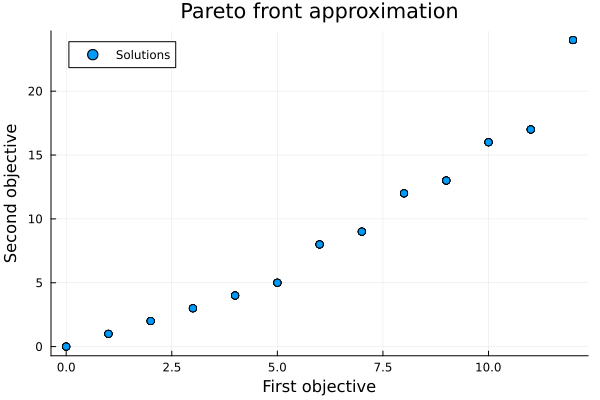

In [13]:
# We must multiply by -1 the first objective as it has to be maximized
front = foundSolutions(solver)
 
for solution in front
    solution.objectives[1] *= -1
end

using Plots
 
# Data to plot
x = [solution.objectives[1] for solution in front];
y = [solution.objectives[2] for solution in front];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")